**Sheet 2**
In this exercise sheet we will visualize simulation data for a simple randomized rumor spreading protocol. We are given a system of **n** agents.
In each round, every agent is activated. All activations are performed atomically and in parallel. Whenever an agent u is activated it opens a connection to a randomly chosen agent v.
There are three simple protocols for information dissemination in this model: push, pull, and pushpull.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
print("Setup Complete")

Setup Complete


In [3]:
def simulate(n, protocol="push", max_rounds=1000, seed=None):
    rng = np.random.default_rng(seed)
    informed = np.zeros(n, dtype=bool)
    informed[0] = True  # one agent starts with the rumor
    informed_counts = [1]  # start with 1 informed agent

    for i in range(max_rounds):
        if informed.all():
            break

        targets = rng.integers(0, n, size=n)
        new_informed = informed.copy()

        if protocol == "push":
            new_informed[targets[informed]] = True
        elif protocol == "pull":
            callers = ~informed
            new_informed[callers] |= informed[targets[callers]]
        elif protocol == "pushpull":
            new_informed[targets[informed]] = True
            callers = ~informed
            new_informed[callers] |= informed[targets[callers]]
        else:
            raise ValueError("Idi nahui'")

        informed = new_informed
        informed_counts.append(informed.sum())

    return np.array(informed_counts)

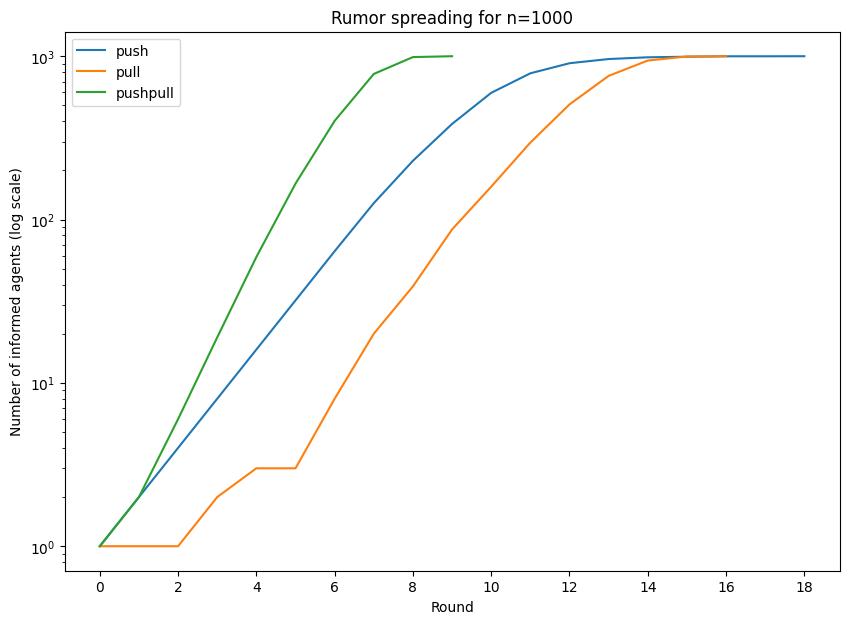

In [19]:
n = 1000
protocols = ["push", "pull", "pushpull"]
results = {proto: simulate(n, protocol=proto, seed=42) for proto in protocols}

# === Plot number of informed agents (log scale) ===
plt.figure(figsize=(10, 7))
for proto in protocols:
    plt.plot(results[proto], label=proto)

plt.yscale("log")
plt.xlabel("Round")
plt.ylabel("Number of informed agents (log scale)")
plt.title(f"Rumor spreading for n={n}")
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

Bar Chart snapshot

Bar

In [ ]:
# ==== Parameters ====
n = 1000
protocols = ["push", "pull", "pushpull"]
seed = 42
round_rand = 5  # random round

# ==== Run simulations ====
results = {proto: simulate(n, protocol=proto, seed=seed) for proto in protocols}

bar_values = []
for proto in protocols:
    counts = results.get(proto, np.array([], dtype=int))
    if counts.size == 0:
        val = 0
    else:
        # take the value at round_to_show if available, otherwise last recorded round
        idx = min(round_rand, counts.size - 1)
        val = int(counts[idx])
    bar_values.append(val)

# ==== Plot snapshot as bar chart ====
plt.figure(figsize=(8, 6))
bars = plt.bar(protocols, bar_values, )
plt.ylabel("Number of informed agents")
plt.title(f"Number of informed agents at round {round_to_show} (n={n})")

plt.show()